##Preliminary Analysis of Data

In [108]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

In [109]:
happiness_data = pd.read_csv("World-happiness-report-2024.csv")

In [110]:
happiness_data.head()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [111]:
happiness_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   Regional indicator            143 non-null    object 
 2   Ladder score                  143 non-null    float64
 3   upperwhisker                  143 non-null    float64
 4   lowerwhisker                  143 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 13.5+ KB


In [112]:
#Drop rows with any missing values
happiness_data = happiness_data.dropna()

#Drop columns with any missing values
happiness_data = happiness_data.dropna(axis=1)

In [113]:
#Looking at the distributions of countries in each unique region
happiness_data['Regional indicator'].value_counts()

,count
Regional indicator,
Sub-Saharan Africa,35
Western Europe,20
Latin America and Caribbean,19
Central and Eastern Europe,17
Middle East and North Africa,15
Southeast Asia,9
Commonwealth of Independent States,9
East Asia,6
South Asia,6


Text(0.5, 1.0, 'Top 10 Happiest Countries')

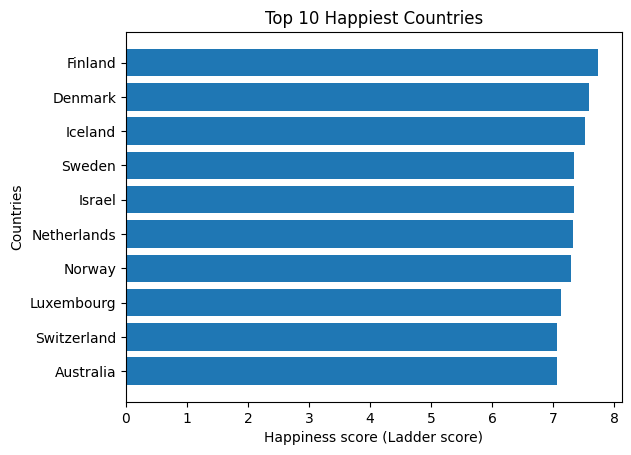

In [114]:
#Top 10 happiest countries based on ladder score
top10 = happiness_data[:10]
plt.barh(top10['Country name'][::-1], top10['Ladder score'][::-1])
plt.xlabel('Happiness score (Ladder score)')
plt.ylabel('Countries')
plt.title('Top 10 Happiest Countries')

(0.0, 10.0)

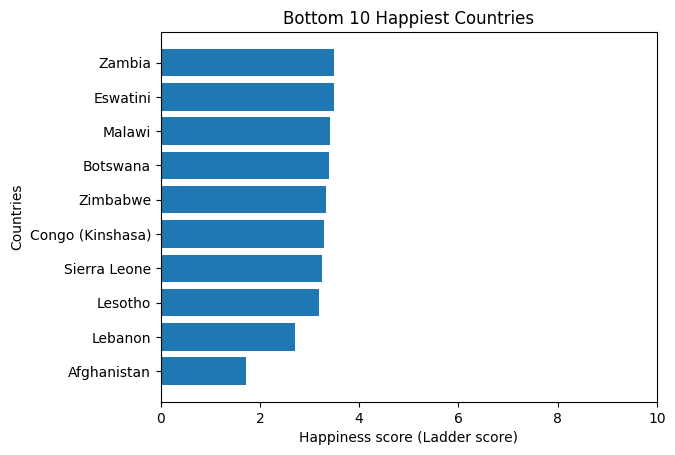

In [115]:
#Bottom 10 happiest countires by ladder score
bottom10 = happiness_data[-10:]
plt.barh(bottom10['Country name'][::-1], bottom10['Ladder score'][::-1])
plt.xlabel('Happiness score (Ladder score)')
plt.ylabel('Countries')
plt.title('Bottom 10 Happiest Countries')
plt.xlim(0, 10)

Text(0.5, 1.0, 'Boxplot of Happiness score')

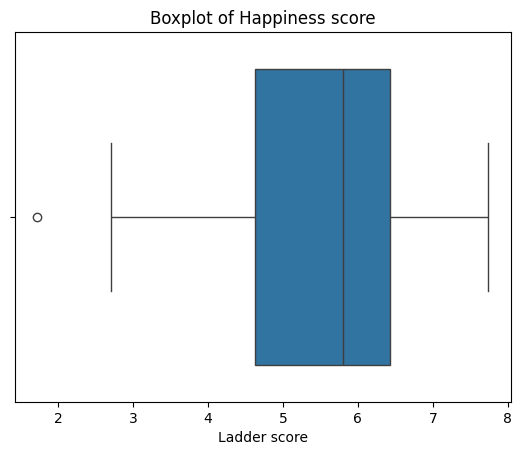

In [116]:
#Boxplot of happiness score
sns.boxplot(data = happiness_data, x = 'Ladder score')
plt.title('Boxplot of Happiness score')

Text(0.5, 1.0, 'Distribution of Ladder Score')

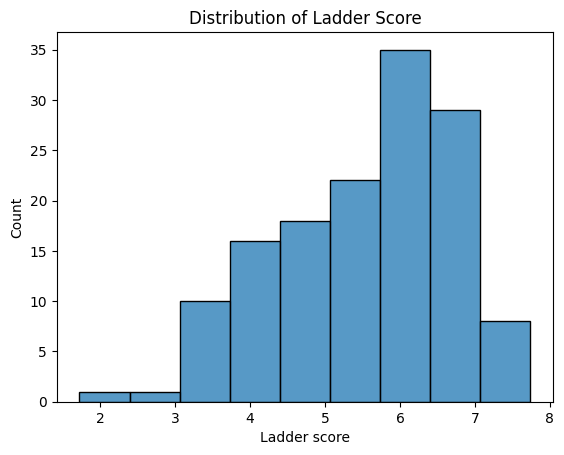

In [117]:
#Histogram of happiness score
sns.histplot(data = happiness_data, x = 'Ladder score')
plt.title('Distribution of Ladder Score')

##Modeling Data



In [118]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [119]:
#Findining current baseline mse
y = happiness_data["Ladder score"]
baseline_pred = np.mean(y)
baseline_mse = mean_squared_error(y, [baseline_pred]*len(y))
print("Baseline MSE: ",baseline_mse)

Baseline MSE:  1.3853774099489795


###Mutiple Regression Model

In [120]:
#Select features (X) and target (Y)
X = happiness_data[['Log GDP per capita', 'Social support', 'Healthy life expectancy',
                    'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Regional indicator']]
y = happiness_data['Ladder score']

#Splitting data into 80-20 training and testing set. 80% of it is training and 20% is testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
#Applying One Hot Encoder to catergoical features
catergorical_features = ['Regional indicator']
transformer = make_column_transformer(
    (OneHotEncoder(drop = 'first', sparse_output = False), catergorical_features), remainder = 'passthrough')

In [122]:
#Create pipeline for mutiple regression model
pipe = Pipeline([('ohe', transformer), ('Model', LinearRegression())])

In [123]:
#Fit pipeline
pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('ohe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Regional indicator'])])),
                ('Model', LinearRegression())])

In [124]:
#Get the intercept
lr = pipe.named_steps['Model']
intercept = lr.intercept_
print("Intercept:", intercept)

Intercept: 2.0503032942860258


In [125]:
#Find feature importances
coefficients = lr.coef_
names = transformer.get_feature_names_out()
pd.DataFrame(coefficients, names)

,0
onehotencoder__Regional indicator_Commonwealth of Independent States,-0.403028
onehotencoder__Regional indicator_East Asia,-0.215537
onehotencoder__Regional indicator_Latin America and Caribbean,0.318266
onehotencoder__Regional indicator_Middle East and North Africa,-0.370002
onehotencoder__Regional indicator_North America and ANZ,0.129253
onehotencoder__Regional indicator_South Asia,-1.094311
onehotencoder__Regional indicator_Southeast Asia,-0.478368
onehotencoder__Regional indicator_Sub-Saharan Africa,-0.333438
onehotencoder__Regional indicator_Western Europe,0.101149
remainder__Log GDP per capita,0.615521


In [126]:
#MSE for test data
y_pred_test = pipe.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
print("MSE on Test Data:", mse)

MSE on Test Data: 0.3094249456106014


In [127]:
#Evaluate the model finding MSE for training data
y_pred_train = pipe.predict(X_train)
mse = mean_squared_error(y_train, y_pred_train)
print("MSE:", mse)

MSE: 0.1907599342235244


###Random Forests Model

In [128]:
#Select features (X) and target (Y)
X = happiness_data[['Log GDP per capita', 'Social support', 'Healthy life expectancy',
                    'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Regional indicator']]
y = happiness_data['Ladder score']

#Splitting data into 80-20 training and testing set. 80% of it is training and 20% is testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
#Define numeric and categorical columns
numeric_features = ['Log GDP per capita', 'Social support', 'Healthy life expectancy',
                    'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
categorical_features = ['Regional indicator']

In [130]:
#Applying One Hot Encoder to catergoical features
transformer = make_column_transformer(
    (OneHotEncoder(drop='first', sparse_output=False), categorical_features),
    remainder='passthrough'
)

In [131]:
#Creating pipeline for Random Forests
pipe = Pipeline([
    ('transformer', transformer),
    ('forest', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [132]:
#Fitting pipeline
pipe.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Regional indicator'])])),
                ('forest', RandomForestRegressor(random_state=42))])

In [133]:
#Finding feature importances
rf_model = pipe.named_steps['forest']
importances = rf_model.feature_importances_
pd.DataFrame(importances, names)


,0
onehotencoder__Regional indicator_Commonwealth of Independent States,0.000599
onehotencoder__Regional indicator_East Asia,0.001509
onehotencoder__Regional indicator_Latin America and Caribbean,0.002684
onehotencoder__Regional indicator_Middle East and North Africa,0.003084
onehotencoder__Regional indicator_North America and ANZ,0.000310
onehotencoder__Regional indicator_South Asia,0.009287
onehotencoder__Regional indicator_Southeast Asia,0.000765
onehotencoder__Regional indicator_Sub-Saharan Africa,0.001650
onehotencoder__Regional indicator_Western Europe,0.000418
remainder__Log GDP per capita,0.172244


In [134]:
#Finding MSE
y_pred = pipe.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Random Forest MSE:", mse)


Random Forest MSE: 0.04330842157857101


###K-Nearest Neighbor Model

In [135]:
#Define features and target
X = happiness_data[['Log GDP per capita', 'Social support', 'Healthy life expectancy',
                    'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Regional indicator']]
y = happiness_data['Ladder score']

#Define numeric and categorical columns
numeric_features = ['Log GDP per capita', 'Social support', 'Healthy life expectancy',
                    'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
categorical_features = ['Regional indicator']

In [136]:
#Apply OHE to catergoical data
transformer = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(drop='first', sparse_output=False), categorical_features)
)

In [137]:
#Create KNN pipeline
pipe= Pipeline([
    ('preprocessor', transformer),
    ('knn', KNeighborsRegressor(n_neighbors=15))
])


In [138]:
#Splitting data into 80-20 training and testing set. 80% of it is training and 20% is testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [139]:
#Fit pipeline
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Log GDP per capita',
                                                   'Social support',
                                                   'Healthy life expectancy',
                                                   'Freedom to make life '
                                                   'choices',
                                                   'Generosity',
                                                   'Perceptions of '
                                                   'corruption']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Regional indicator'])])),
                ('knn', KNeighborsRegressor(n_neighbors=15))])

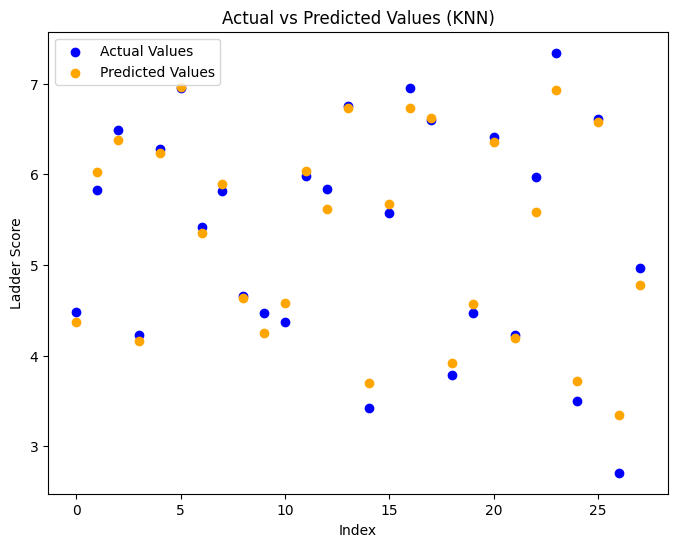

In [140]:
#Plot actual values
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values')

#Plot predicted values
plt.scatter(range(len(y_pred)), y_pred, color='orange', label='Predicted Values')

#Add labels, title, and legend
plt.xlabel("Index")
plt.ylabel("Ladder Score")
plt.title("Actual vs Predicted Values (KNN)")
plt.legend()

In [141]:
#Finding MSE
y_pred = pipe.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("KNN MSE:", mse)

KNN MSE: 0.333847481111111


###Decision Tree Model

In [142]:
#Define features and target
X = happiness_data[['Log GDP per capita', 'Social support', 'Healthy life expectancy',
                    'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Regional indicator']]
y = happiness_data['Ladder score']

#Define numeric and categorical columns
numeric_features = ['Log GDP per capita', 'Social support', 'Healthy life expectancy',
                    'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
categorical_features = ['Regional indicator']



In [143]:
#Applying One Hot Encoder to catergoical features
transformer = make_column_transformer(
    (OneHotEncoder(drop='first', sparse_output=False), categorical_features),
    remainder='passthrough'
)

In [144]:
#Construct decision tree pipeline
pipe = Pipeline([
    ('transformer', transformer),
    ('decision_tree', DecisionTreeRegressor(max_depth=5, random_state=42))
])

In [145]:
#Fit piepline
pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Regional indicator'])])),
                ('decision_tree',
                 DecisionTreeRegressor(max_depth=5, random_state=42))])

In [146]:
#Defining grid search parameter and initializing grid search
param_grid = {'decision_tree__max_depth': [3, 5, 10, None] }
grid_search = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', cv=5)

#Fit gridsearch pipeline
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['Regional '
                                                                          'indicator'])])),
                                       ('decision_tree',
                                        DecisionTreeRegressor(max_depth=5,
                                                              random_state=42))]),
             param_grid={'decision_tree__max_depth': [3, 5, 10, None]},
             scoring='neg_mean_squared_error')

In [147]:
#Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'decision_tree__max_depth': 3}


In [148]:
#Finding feature importances
dt_model = pipe.named_steps['decision_tree']
importances = dt_model.feature_importances_
pd.DataFrame(importances, names)

,0
onehotencoder__Regional indicator_Commonwealth of Independent States,0.000000
onehotencoder__Regional indicator_East Asia,0.000000
onehotencoder__Regional indicator_Latin America and Caribbean,0.002207
onehotencoder__Regional indicator_Middle East and North Africa,0.000000
onehotencoder__Regional indicator_North America and ANZ,0.000000
onehotencoder__Regional indicator_South Asia,0.019263
onehotencoder__Regional indicator_Southeast Asia,0.000000
onehotencoder__Regional indicator_Sub-Saharan Africa,0.000000
onehotencoder__Regional indicator_Western Europe,0.000000
remainder__Log GDP per capita,0.138521


Text(0.5, 1.0, 'Decision Tree')

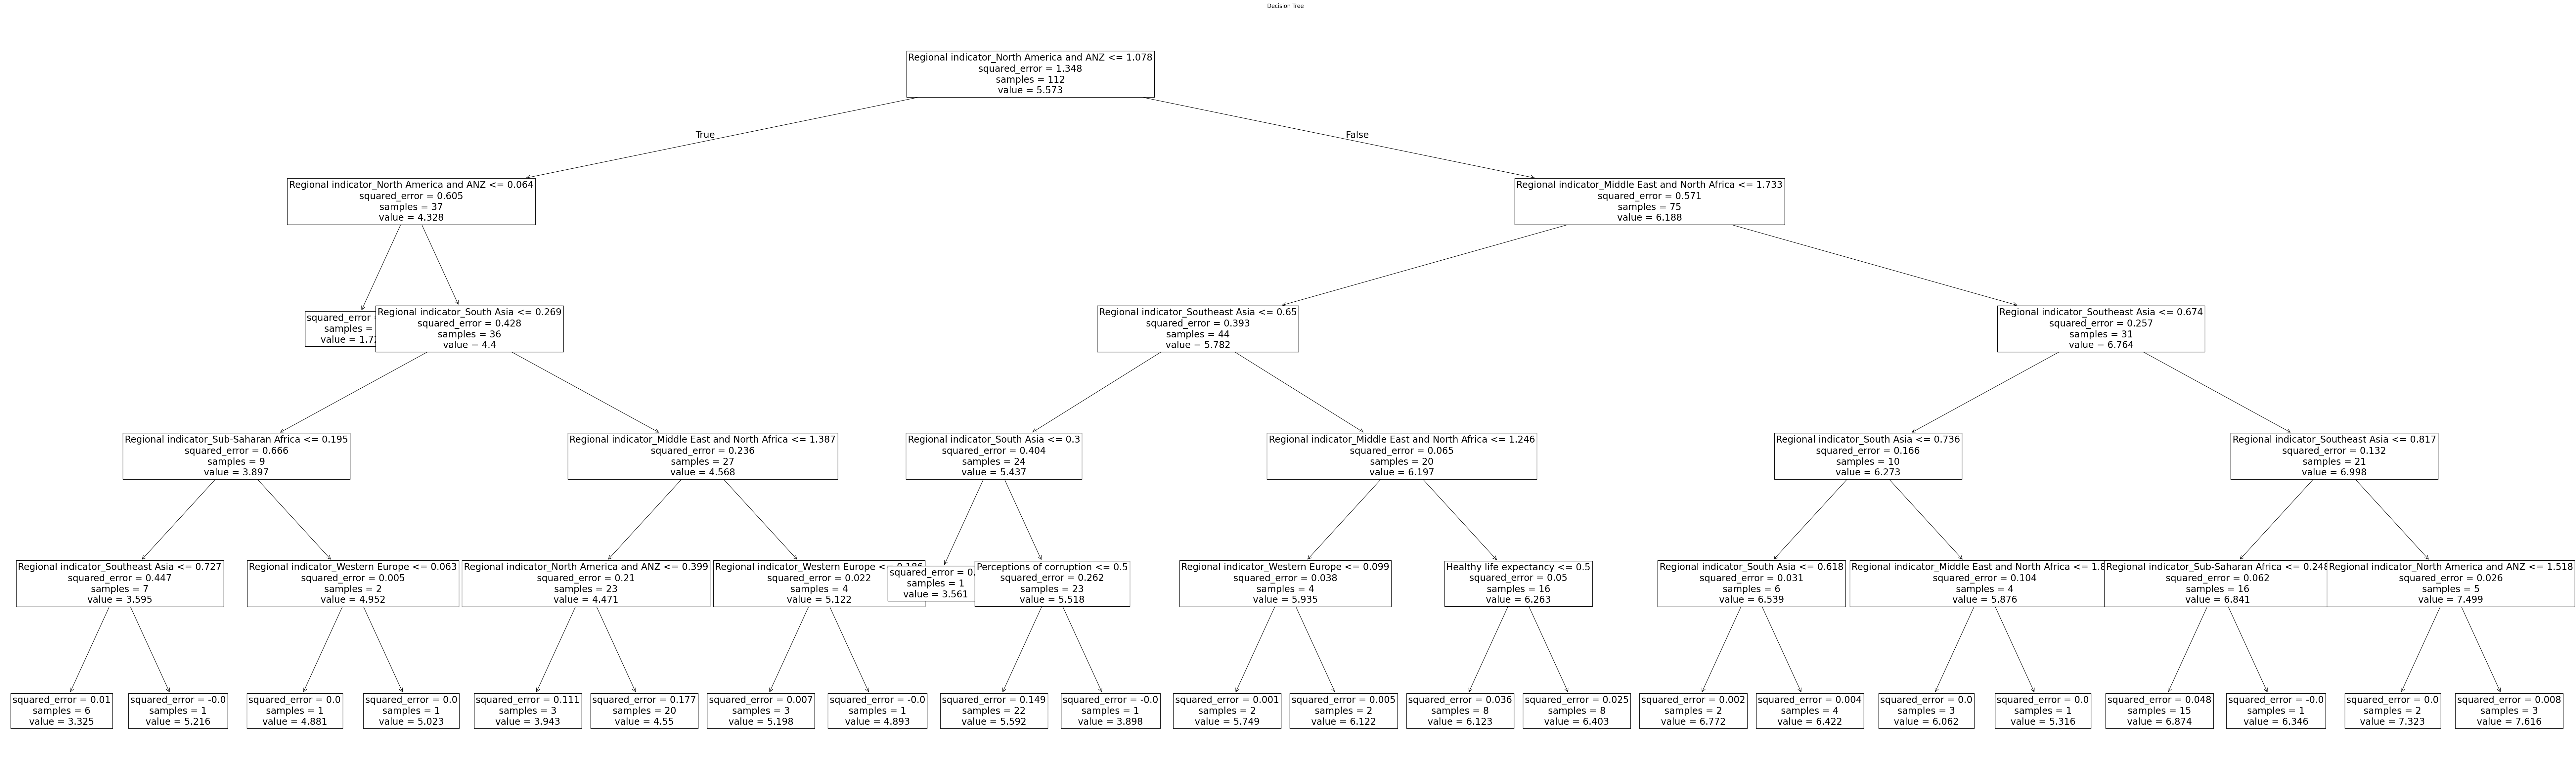

In [149]:
#Plot the tree
plt.figure(figsize=(100, 30))
plot_tree(dt_model, feature_names=numeric_features + transformer.named_transformers_['onehotencoder'].get_feature_names_out(categorical_features).tolist(), fontsize=20)
plt.title("Decision Tree")

In [150]:
#Finding MSE
y_pred = pipe.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Decision Tree MSE:", mse)

Decision Tree MSE: 0.4940278535520587


###Gradient Boosting Regression Model

In [151]:
#Define features and target
X = happiness_data[['Log GDP per capita', 'Social support', 'Healthy life expectancy',
                    'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Regional indicator']]
y = happiness_data['Ladder score']

#Define numeric and categorical columns
numeric_features = ['Log GDP per capita', 'Social support', 'Healthy life expectancy',
                    'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
categorical_features = ['Regional indicator']


In [152]:
#Apply One Hot encoder on categorical data
transformer = make_column_transformer(
    (OneHotEncoder(drop='first', sparse_output=False), categorical_features),
    remainder='passthrough' )

In [153]:
#Create gradient boosting regressor pipeline
pipe = Pipeline([
    ('transformer', transformer),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42))
])

In [154]:
#Splitting data into 80-20 training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [155]:
#Fit pipeline
pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Regional indicator'])])),
                ('gradient_boosting',
                 GradientBoostingRegressor(max_depth=5, random_state=42))])

In [156]:
#Determining feature importances
gb_model = pipe.named_steps['gradient_boosting']
importances = dt_model.feature_importances_
pd.DataFrame(importances, names)

,0
onehotencoder__Regional indicator_Commonwealth of Independent States,0.000000
onehotencoder__Regional indicator_East Asia,0.000000
onehotencoder__Regional indicator_Latin America and Caribbean,0.002207
onehotencoder__Regional indicator_Middle East and North Africa,0.000000
onehotencoder__Regional indicator_North America and ANZ,0.000000
onehotencoder__Regional indicator_South Asia,0.019263
onehotencoder__Regional indicator_Southeast Asia,0.000000
onehotencoder__Regional indicator_Sub-Saharan Africa,0.000000
onehotencoder__Regional indicator_Western Europe,0.000000
remainder__Log GDP per capita,0.138521


Text(0.5, 1.0, 'Residual Plot (Gradient Boosting)')

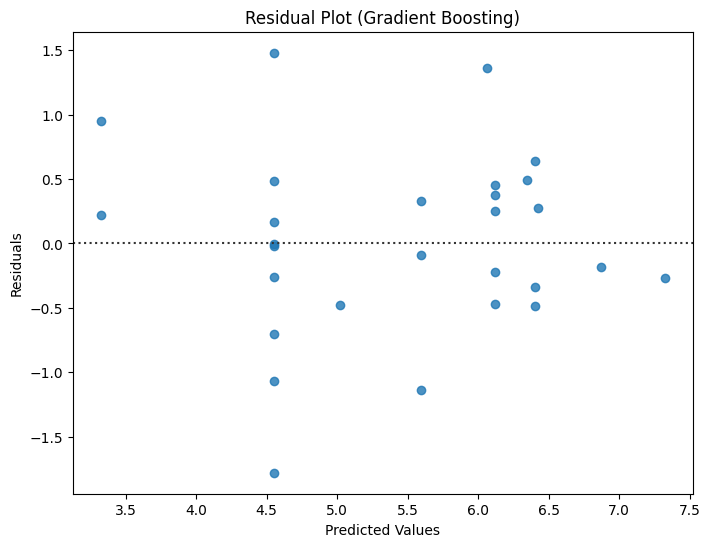

In [157]:
#Plotting residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Gradient Boosting)")

In [158]:
#Finding MSE
y_pred = pipe.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Gradient Bossting:", mse)

Gradient Bossting: 0.35070549047787253
